# Model performance and Bench marking !!!!

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
import tensorflow as tf
import numpy as np

interpreter = tf.lite.Interpreter(model_path="../models/model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

X_test = np.random.rand(1, 543, 3).astype('float32')

interpreter.set_tensor(input_details[0]['index'], X_test)
interpreter.invoke()

y_pred = interpreter.get_tensor(output_details[0]['index']).flatten()
print(f"# NaN Values In Prediction: {np.isnan(y_pred).sum()}")
print(f"Prediction shape: {y_pred.shape}")
print(f"Sample predictions: {y_pred[:10]}")


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


# NaN Values In Prediction: 0
Prediction shape: (250,)
Sample predictions: [-0.8097782   0.4663803  -0.58955956 -0.15778303 -0.66082364  0.6971363
  0.6325694   0.24348226 -1.0076799   0.0467125 ]


In [5]:
import statistics

runs = 200
times = []

for _ in range(runs):
    start = time.perf_counter()
    interpreter.set_tensor(input_details[0]['index'], X_test)
    interpreter.invoke()
    _ = interpreter.get_tensor(output_details[0]['index'])
    end = time.perf_counter()
    times.append((end - start) * 1000)  # ms

print(f"Average inference time: {np.mean(times):.3f} ms")
print(f"Standard deviation: {np.std(times):.3f} ms")
print(f"Min: {np.min(times):.3f} ms, Max: {np.max(times):.3f} ms")


Average inference time: 1.241 ms
Standard deviation: 0.274 ms
Min: 1.119 ms, Max: 3.106 ms


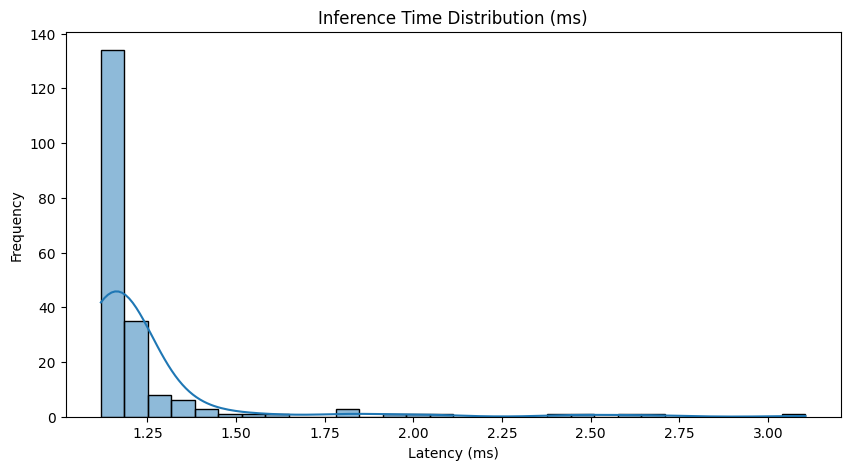

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(times, bins=30, kde=True)
plt.title("Inference Time Distribution (ms)")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.show()


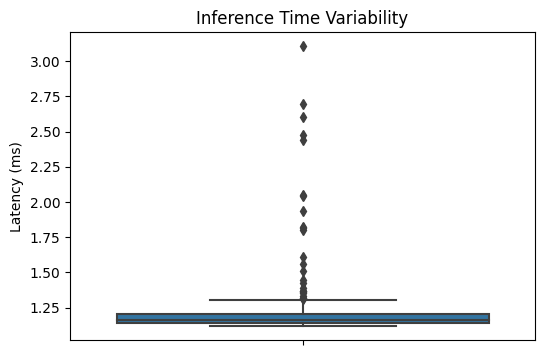

In [16]:
# --- Boxplot: quick view of variation/outliers ---
plt.figure(figsize=(6,4))
sns.boxplot(y=times)
plt.title("Inference Time Variability")
plt.ylabel("Latency (ms)")
plt.show()




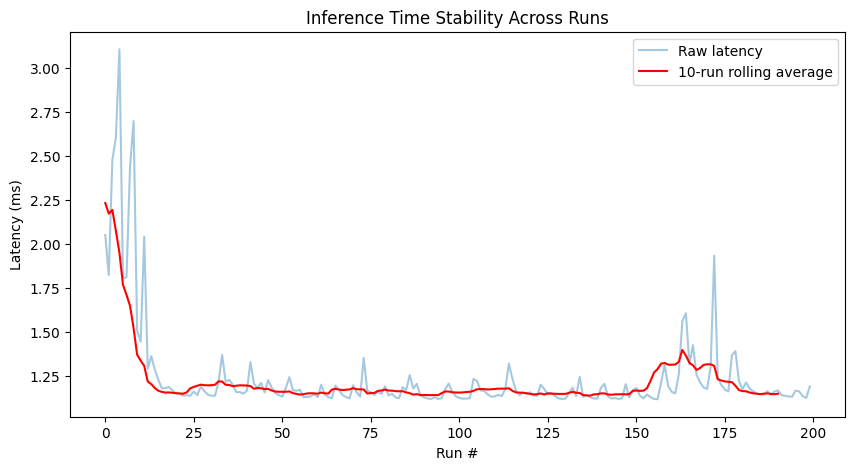

In [17]:
# --- Rolling average plot: stability trend ---
window = 10
rolling_avg = np.convolve(times, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10,5))
plt.plot(times, alpha=0.4, label='Raw latency')
plt.plot(rolling_avg, color='red', label=f'{window}-run rolling average')
plt.title("Inference Time Stability Across Runs")
plt.xlabel("Run #")
plt.ylabel("Latency (ms)")
plt.legend()
plt.show()

In [18]:
# Re-run one inference to grab model output
interpreter.set_tensor(input_details[0]['index'], X_test)
interpreter.invoke()
y_pred = interpreter.get_tensor(output_details[0]['index']).flatten()

# --- Basic info ---
print(f"# NaN Values in Prediction: {np.isnan(y_pred).sum()}")
print(f"Prediction shape: {y_pred.shape}")
print(f"Sample predictions: {y_pred[:10]}")

# NaN Values in Prediction: 0
Prediction shape: (250,)
Sample predictions: [-0.8097782   0.4663803  -0.58955956 -0.15778303 -0.66082364  0.6971363
  0.6325694   0.24348226 -1.0076799   0.0467125 ]


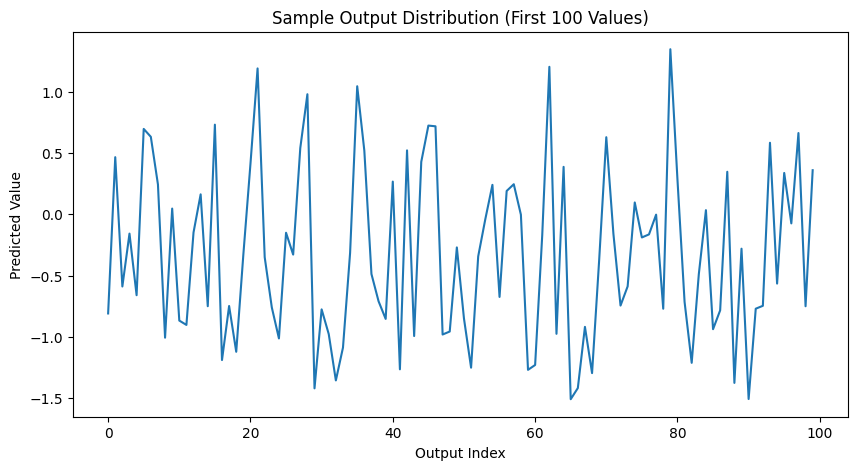

In [19]:
# --- Line plot: output pattern (first 100 values) ---
plt.figure(figsize=(10,5))
plt.plot(y_pred[:100])
plt.title("Sample Output Distribution (First 100 Values)")
plt.xlabel("Output Index")
plt.ylabel("Predicted Value")
plt.show()

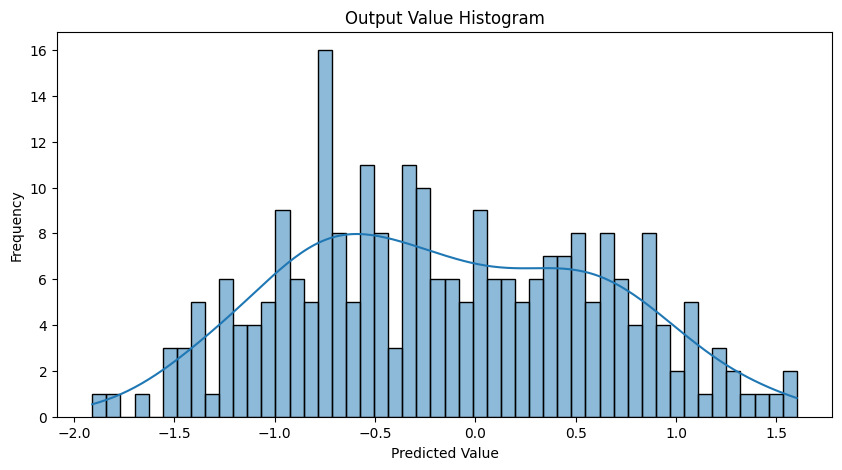

In [20]:
# --- Histogram: output spread ---
plt.figure(figsize=(10,5))
sns.histplot(y_pred, bins=50, kde=True)
plt.title("Output Value Histogram")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()